# 9. 백석과 김수영의 시 학습

**인공지능은 백석과 김수영의 시를 구분 할 수 있을까?**


**시인들에게 많은 영향을 주었던 김수영과 백석 시인의 시를 인공지능이 이해하고 구분해 적용해볼 수 있을까?**

```
```

**백석**은 평안북도에서 태어나 평안도를 비롯하여 여러 지역 사투리와 고어를 사용했다. 따라서 특유의 향토적인 감성이 드러나있다.

**김수영**은 서울에서 태어나 초기에는 현대문명과 도시 생활을 비판하는 모습이 나타나지만, 4.19 혁명을 기점으로 표현의 자유를 억압하는 독재 정권에 맞서 타협하지 않는 정신을 강조하는 시를 많이 썼다.


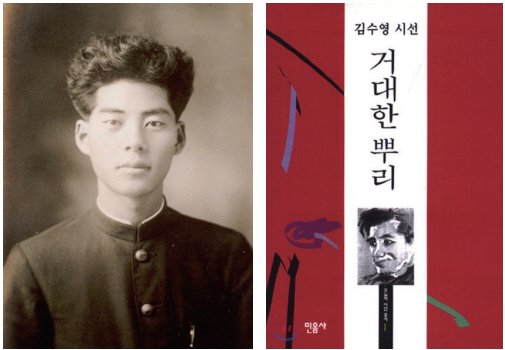

- 자연어 데이터 수집 및 전처리 방법을 이해한다. 
- 머신러닝 지도 학습 분류 알고리즘 중 나이브 베이지안에 대해 이해한다. 
- 자연어 처리를 통한 시 분류 인공지능 모델을 제작한다.



**<해결 모델은?>**

이번 Unit에서는 백석과 김수영의 시를 **‘자연어 처리’**하고 **나이브 베이지안 알고리즘**으로 분류하는 인공지능 모델을 만들어 본다.

두 시인의 독자적인 세계를 인공지능을 통해 이해하고 적용해 봄으로써 

인공지능이 언어와 결합되어 나타날 때 문학 분야에서 어떻게 활용될 수 있을지 생각해 보자.

# [개념] 인공지능 알고리즘

지도 학습 분류(Classification)와 관련한 논문, 서적, 인터넷 자료를 보면 다양한 알고리즘이 나오는데, 그중에도 언급이 잘 되지 않는 분류 알고리즘이 바로 나이브 베이지안(Naive Bayes)이다. 

나이브 베이지안 알고리즘이 많이 사용되는 분야가 바로 ‘자연어 처리’이다. 컴퓨터에서 사용하는 프로그래밍 언어와 구분하기 위해 인간이 일상생활에서 의사소통을 위해 사용하는 언어를 ‘자연어’라고 하고 컴퓨터를 활용하여 자연어를 분석하고 활용하는 것을 ‘자연어 처리(Natural Language Processing)’, 줄여서 ‘NLP’라고 한다.

## 나이브 베이지안이란?

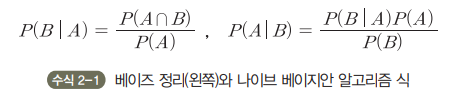

나이브 베이지안 알고리즘은 베이즈 정리(Bayes’ theorem)에 기반한 분류 알고리즘으로, 베이즈 정리를 알기 위해서는 조건부 확률을 알아야 한다. 조건부 확률은 어떤 사건이 일어나는 경우에 다른 사건이 일어날 확률을 말한다. 즉, P(B|A)는 A와 B가 동시에 일어날 확률을 A가 일어날 확률로 나눈 것이고, 이러한 베이즈 정리를 곱셈 공식으로 변형한 것이 나이브 베이지안 알고리즘의 식이다.

나이브 베이지안 알고리즘을 쉽게 이해하기 위해 토익 문제들을 학습하여 정답 분류 인공지능을 
만든다고 가정해 보자. 
먼저 다음 보기에 ‘probably’가 있는 10개의 문제만으로 머신러닝을 학습시킬 것이다.

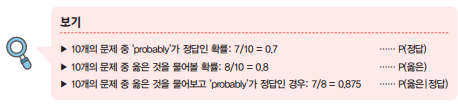

이제 ‘probably’가 보기에 있고 옳은 것을 물어보는 문제 중 ‘probably’가 정답일 조건부 확률을 구해 보자. 

[수식 2-1]에 대입하면 P(정답|옳은)=P(옳은|정답)×P(정답)/P(옳은)이고 0.875×
0.7/0.8=약 0.766이다. 
위 가정을 토대로 하면 옳은 것을 물어보는 토익 문제에서 ‘probably’가 보기에 있으면 76.6%의 확률로 정답인 것이다. 



---


나이브 베이지안 알고리즘은 자연어 처리를 할 때 이러한 단어들의 조건부 확률을 종합해서 판단한다. 


---


토익 한 문제에 나온 단어는 많지만 각각 단어의 빈도수는 적다. 
위 예시의 ‘probably’처럼 열 번의 빈도수만으로도 확률을 구할 수 있다. 이것은 적은 데이터로도 머신러닝 학습이 가능하다는 뜻이다. 적은 데이터로도 ‘단순화’ 시켜서 쉽고 빠르게 판단을 내리는 특징이 있어 나이브 베이지안 알고리즘은 자연어 처리에 적합하다.

# [실습]

## 코랩 환경 설정하기 

백석과 김수영의 시를 분류하는 인공지능 제작을 위해  업데이트와 설정을 해 준다. 

(업데이트, 모듈 설치, 라이브러리 호출 등과 관련해서는 인공지능 모델 제작을 하며 더 자세히 다룬다.)

In [ ]:
#리눅스 업데이트
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy
%%shell
#Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF
#Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg
#Prefer debian repo for chromium* packages only
#Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500
Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300
Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF
#Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver
#Install selenium
pip install selenium

In [ ]:
#필요한 라이브러리 호출
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import re
import konlpy
from konlpy.tag import Okt
import tqdm
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from bs4 import BeautifulSoup
import time
from tqdm import tnrange
from urllib.request import urlopen
import requests
import urllib.request

## 시 데이터 불러오고 번역하기 

백석의 시와 김수영의 시를 모아둔 데이터를 [코드 2-3]과 같이 불러온다. url_1과 url_2 같이 
이미 만들어진 구글 다이렉트 다운로드 링크를 사용해도 되고, 삼양미디어 고객센터 자료실(http://
samyangm.com/shop/bbs/board.php?bo_table=shop_data)에서 파일을 다운로드한 후 개인 구글 
드라이브에 올려 링크를 새로 만들어도 된다.

In [ ]:
url_1 = "https://drive.google.com/uc?export=download&id=1I5k_du8aYsxdAXbqYJu60nU-3PDOb6_X" #김수영의 시 모음
url_2 = "https://drive.google.com/uc?export=download&id=1qlO9hbiEnL3J7b1JKRFE5lMOrvF_13CR" #백석의 시 모음
soo = pd.read_csv(url_1, delimiter=',', encoding='cp949') #김수영 시 데이터프레임 로드
baek = pd.read_csv(url_2, delimiter=',', encoding='cp949') #백석 시 데이터프레임 로드
print(soo.head())
baek.head()

                                             content
0  남묘(南廟) 문고리 굳은 쇠 문고리\n\n기어코 바람이 열고\n\n열사흘 달빛은\n...
1  백화(白花)의 의장(意匠)\n\n만화(萬華)의 거동의\n\n지금 고오히 잠드는 얼을...
2  꽃이 열매의 상부에 피었을 때\n\n너는 줄넘기 작란(作亂)을 한다\n\n \n\n...
3  가까이 할 수 없는 서적이 있다\n\n이것은 먼 바다를 건너온\n\n용이하게 찾아갈...
4  흘러가는 물결처럼\n\n지나인(支那人)의 의복\n\n나는 또 하나의 해협을 찾았던 ...


,content
0,가난한 내가\n아름다운 나타샤를 사랑해서\n오늘밤은 푹푹 눈이 나린다\n\n나타샤를...
1,당콩밥에 가지 냉국의 저녁을 먹고 나서\n바가지꽃 하이얀 지붕에 박각시 주락시 붕붕...
2,여승은 합장하고 절을 했다\n가지취의 내음새가 났다\n쓸쓸한 낯이 녯날같이 늙었다\...
3,가무락조개 난 뒷간거리에\n빚을 얻으려 나는 왔다\n빚이 안 되어 가는 탓에\n가무...
4,눈이 많이 와서\n산엣새가 벌로 나려 멕이고\n눈구덩이에 토끼가 더러 빠지기도 하면...


In [ ]:
#[코드 2-4]
soo_new = soo['content'] #김수영의 시 내용만 가져오기
soo_new.reset_index(drop = True, inplace = True) #행 번호(인덱스) 초기화하고, 빈칸 없애기
soo_new = soo_new.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", " ") #정규식으로 표현(한글만 남기고 필요 없는 기호들 삭제)

<ipython-input-8-acbcdfed752f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  soo_new = soo_new.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", " ") #정규식으로 표현(한글만 남기고 필요 없는 기호들 삭제)


In [ ]:
baek_new = baek['content'] #백석의 시 내용만 가져오기
baek_new.reset_index(drop = True, inplace = True) #행 번호(인덱스) 초기화하고, 빈칸 없애기
baek_new = baek_new.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]"," ") #정규식으로 표현(한글만 남기고 필요 없는 기호들 삭제)

<ipython-input-9-a4a634fa1227>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  baek_new = baek_new.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]"," ") #정규식으로 표현(한글만 남기고 필요 없는 기호들 삭제)


In [ ]:
for i in range(15):
  print(i, ": 길이", len(soo_new[i]))

0 : 길이 229
1 : 길이 180
2 : 길이 222
3 : 길이 426
4 : 길이 261
5 : 길이 367
6 : 길이 383
7 : 길이 418
8 : 길이 458
9 : 길이 311
10 : 길이 804
11 : 길이 2735
12 : 길이 409
13 : 길이 951
14 : 길이 492


 11번 시는 글자 수가 2409자나 된다. 
 
 최근 우분트 업데이트로 인해 크롬 드라이브를 통해 웹 크롤링 작업을 할 경우 우회 코드를 이용한 방법을 사용해야 한다. 
 
 글자 수가 많은 시를 웹 크롤링할 경우 오류가 발생하기 때문에, 안정적으로 400자 정도마다 시를 나눠 줘야 오류 없이 웹 크롤링이 가능하다.

In [ ]:
import math

#Divide long poems and save to a new list
soo_divided = []
for poem in soo_new:
  if len(poem) > 400:
    num_segments = math.ceil(len(poem) / 400)
    for i in range(num_segments):
      segment = poem[i*400:(i+1)*400]
      soo_divided.append(segment)
  else:
    soo_divided.append(poem)

#Divide long poems and save to a new list
baek_divided = []
for poem in baek_new:
  if len(poem) > 400:
    num_segments = math.ceil(len(poem) / 400)
    for i in range(num_segments):
      segment = poem[i*400:(i+1)*400]
      baek_divided.append(segment)
  else:
    baek_divided.append(poem)

In [ ]:
for i in range(15):
  print(i, ": 길이", len(soo_divided[i]))

0 : 길이 229
1 : 길이 180
2 : 길이 222
3 : 길이 400
4 : 길이 26
5 : 길이 261
6 : 길이 367
7 : 길이 383
8 : 길이 400
9 : 길이 18
10 : 길이 400
11 : 길이 58
12 : 길이 311
13 : 길이 400
14 : 길이 400


반복문을 사용해서 시를 불러오고 400자를 넘으면 나눠서 저장한 후 15번째 시까지 불러오면 400자 이하로 저장된 것을 확인 할 수 있다.

시인은 개성이 드러나는 각자의 문체가 있다. 

백석의 시나 김수영의 시 속에 들어 있는 각자의 문체와 방언들을 표준어로 바꿔 그 결과를 원래 있던 시 데이터와 합친다. 시를 표준어로 바꾸는 방법은 번역기(여기서는 네이버 ‘파파고’를 사용)를 활용해 영어로 번역한 후 다시 한글로 번역하는 것이다. 이를 위해서는 코랩과 웹을 연결해야 한다. 

- 네 번째 줄은 웹 크롤링(web crawling, 웹의 정보를 자동화된 방법으로 탐색하는 것)을 
위한 크롬 드라이버 설정 코드이다. 
- 다섯 번째 줄은 인터넷 창이 안 뜨고 웹과 연결해 주는 것이고, 
- 여섯 번째 줄은 웹과 코랩 연동을 수월하게 하기 위해 보안을 약하게 만드는 코드이다. 
- 일곱 번째 
줄은 공유 메모리를 \dev\shm 디렉터리를 사용하지 않고 바로 연결해 주는 것이다. 
- 마지막으로 
크롬 드라이버를 실행하면 코랩과 웹이 연결된다.

In [ ]:
# -*- coding: UTF-8 -*-
from selenium import webdriver
from selenium.webdriver.common.by import By
options = webdriver.ChromeOptions() #웹 크롤링을 위한 크롬 드라이버 설정
options.add_argument('--headless') #인터넷 창이 안 뜨게
options.add_argument('--no-sandbox') #코랩과 웹 연결을 위해 보안을 약하게 만드는 코드
options.add_argument('--disable-dev-shm-usage') #공유 메모리를 담당하는 \dev\shm 디렉터리를 사용하지 않게 해 주는 코드
driver = webdriver.Chrome('chromedriver', options=options) #크롬 드라이버 사용

미리 불러온 셀레늄(selenium) 모듈과 크롬 웹 드라이버를 이용해 준비한 시 파일을 네이버 파파고 번역기에 넣어 ‘한글 → 영어 → 한글’순으로 변환한다. 
- tqdm(  )은 몇 % 진행되었는지, 얼마나 시간이 지났는지, 남았는지 등 반복문 진행률을 표시해 주어 긴 작업의 진행 상태를 나타낸다.
- 파파고 웹 주소에 번역할 언어와 글( https: //papago.naver.com/?sk=ko&tk=번역할 언어&st=번역할 글) 을 조합하면 코랩 내부에서 웹 크롤링으로 번역을 요청하고
- find_element(  ) 함수에 번역 결과 경로를 넣으면 번역된 데이터를 가져올 수 있다. 
- 마지막으로 원하는 리스트에 번역된 결과를 추가하는 함수가 append(  )이다. 
- 한글을 영어(kor_to_trans)로, 영어를 한글(trans_to_kor)로 번역한다.

In [ ]:
def kor_to_trans(text_data, trans_lang):
  for i in tqdm(range(len(text_data))):
    try:
      driver.get('https://papago.naver.com/?sk=ko&tk='+trans_lang+'&st='+text_data[i])
      time.sleep(2.5)
      backtrans = driver.find_element('xpath', '//*[@id="txtTarget"]/span').text
    except:
      driver.get('https://papago.naver.com/?sk=ko&tk='+trans_lang)
      driver.find_element('xpath', '//*[@id="txtSource"]').send_keys(text_data[i])
      time.sleep(2.5)
      backtrans = driver.find_element('xpath', '//*[@id="txtTarget"]/span').text
      trans_list.append(backtrans)
def trans_to_kor(transed_list, transed_lang):
  for i in tqdm(range(len(transed_list))):
    try:
      driver.get('https://papago.naver.com/?sk='+transed_lang+'&tk=ko&st='+transed_list[i])
      time.sleep(2.5)
      backtrans = driver.find_element('xpath', '//*[@id="txtTarget"]/span').text
      backtrans_list.append(backtrans)
    except:
      driver.get('https://papago.naver.com/?sk='+transed_lang+'&tk=ko')
      driver.find_element('xpath', '//*[@id="txtSource"]').send_keys(transed_list[i])
      time.sleep(2.5)
      backtrans = driver.find_element('xpath', '//*[@id="txtTarget"]/span').text
      backtrans_list.append(backtrans)

한글을 영어로 번역한 후 담을 리스트(trains_list)와 영어를 한글로 번역한 후 담을 리스트
(backtrans_list)를 선언한 후 위에서 만든 번역 함수로 실행한다. 그 후 데이터 처리를 위해 판다스 
데이터 프레임을 만들고 원래 김수영의 시와 합친다.

In [ ]:
trans_list = [] #한국어 -> 영어를 담을 리스트
backtrans_list = [] #영어 -> 한국어를 담을 리스트

In [ ]:
kor_to_trans(soo_divided,'en') #한글 -> 영어
trans_to_kor(trans_list,'en') #영어 -> 한글
trans_list = pd.DataFrame({'content':trans_list}) #영어 -> 한글로 된 글을 데이터 프레임으로 만들기
soo = pd.concat([soo,trans_list],ignore_index=True) #데이터 프레임으로 만든 번역 글을 원래 데이터와 합치기

In [ ]:
trans_list = [] #한글 -> 영어를 담을 리스트
backtrans_list = [] # 영어 -> 한글을 담을 리스트

In [ ]:
kor_to_trans(baek_divided, 'en') #한글 -> 영어
trans_to_kor(trans_list, 'en') #영어 -> 한글
trans_list = pd.DataFrame({'content':trans_list}) #영어-> 한글로 된 글을 데이터 프레임으로 만들기
baek = pd.concat([baek,trans_list],ignore_index=True) #데이터 프레임으로 만든 번역 글을 원래 데이터와 합치기

## 시 데이터 전처리하기 

불러온 원본과 번역된 시 데이터를 전처리해 보자. 

먼저 김수영의 시에는 ‘soo’, 백석의 시에는 ‘baek’이라는 라벨을 부여하고 하나의 파일(poetry)로 합친다.

In [ ]:
#poet(시인) 열을 추가하고 김수영 시는 soo, 백석 시는 baek 이라는 라벨 부여하기
soo['poet'] ='soo'
baek['poet'] = 'baek'
poetry = soo.append(baek, ignore_index=True) #poetry(시집)에 김수영 시와 백석 시를 같이 담기

<ipython-input-24-4a53d82192c0>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  poetry = soo.append(baek, ignore_index=True) #poetry(시집)에 김수영 시와 백석 시를 같이 담기


합친 시 데이터에 Null 값이 존재하면 행을 제거하고 잘 제거되었는지 확인한다. 
- isnull(  ) 함수는 
Null 값이 존재하는지 확인해 주고 False가 나오면 Null 값이 존재하지 않는다는 의미이다.

In [ ]:
poetry = poetry.dropna(how = 'any') #Null 값이 존재하는 행 제거
print(poetry.isnull().values.any()) #Null 값이 존재하는지 확인

False


중복 데이터를 drop_duplicates(  ) 함수로 없애 주면 시 데이터 전처리가 끝난다. 이제 개수를 
확인해 본다.

In [ ]:
poetry.drop_duplicates(subset=['content'], inplace=True) #똑같은 데이터 없애기

146


<Axes: >

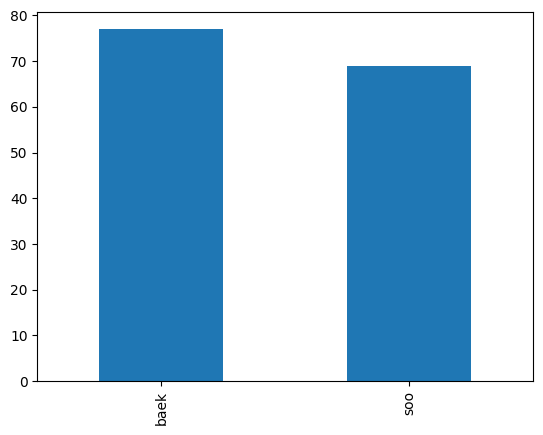

In [ ]:
print(len(poetry)) #총 시 개수
poetry['poet'].value_counts().plot(kind = 'bar') #백석과 김수영 시 개수 비교

마지막으로는 각 시인의 특성을 드러내지 못하고 일반적으로 쓰이는 표현인 ‘불용어’를 제거해야 한다. (부사격 조사인 ‘-쪽으로’, ‘-까지’와 같은 형식 형태소나 수를 표현하는 수사 등)

- 맨 처음 불러온 모듈 중 koNLPy에 ‘Okt’라는 형태소 분석기를 불러오고 한국어 불용어 리스트
(https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_
stopwords.txt)가 저장된 파일을 불러온다. 

- 토큰화된 문장을 담을 리스트(tokenized_data)를 선언하고 시집(poetry)에 있는 시를 하나씩 불러와서 토큰화(okt.morphs(  ))를 한다. 

- 더불어 한국어 불용어 리스트를 참고해 불용어를 제거하고 전처리된 시를 저장한다. 인공지능 분류를 위해 백석의 시는 0으로, 김수영의 시는 1로 라벨링을 해주고 잘되었는지 확인해 본다. 


100%|██████████| 146/146 [00:12<00:00, 11.79it/s]


<Axes: >

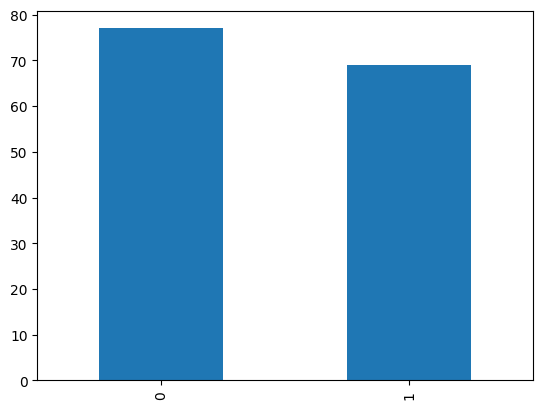

In [ ]:
okt = Okt() #한국어 토큰화를 위한 Konlpy의 okt 객체 불러오기
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist() #한국어 불용어 리스트 불러오기
tokenized_data = [] #토큰화된 문장 담을 리스트
for sentence in tqdm(poetry['content']): #시집에 있는 시 하나씩 불러와서
  tokenized_sentence = okt.morphs(sentence, stem=True) #토큰화
  stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] #불용어 제거
  tokenized_data.append(stopwords_removed_sentence) #전처리된 시 저장
poetry['poet'] = poetry['poet'].replace(['baek', 'soo'],[0,1]) #백석을 0, 김수영을 1로 라벨링
poetry['poet'].value_counts().plot(kind = 'bar') #클래스의 비율 비교

## TF-IDF 처리하기 

시 데이터(poetry)에 토큰화된 데이터(tokenized_data)를 덮어쓰기해 저장하고 train_test_split
모듈을 이용해 훈련 데이터와 테스트 데이터를 9:1 비율로 분리하고, 랜덤(shuffle=True)으로 클
래스 비율은 동일(stratify=poetry[‘poet’])하게 나눈다.

In [ ]:
from sklearn.model_selection import train_test_split

poetry['content']=tokenized_data #토큰화된 데이터 가져오기
X_train, X_test, y_train, y_test = train_test_split(poetry[['content']],
                                                    poetry['poet'],test_size=0.1,#데이터를 9:1의 비율로 분리
                                                    shuffle=True,
                                                    stratify=poetry['poet'],#데이터를 클래스 비율이 균등하게 분리
                                                    random_state=1004)

자연어 처리에서 중요한 것은 단어의 빈도다. TF-IDF는 Term Frequency-Inverse Document Frequency의 약자로,

 TF(문서 빈도)는 한 단어가 어떤 한 문서에서 등장하는 빈도이고 그 단어가 한 문서에서 많이 나오면 가중치가 높아지는 것을 의미한다. 

반대로 IDF(역 문서 빈도)는 한 단어가 어떤 문서군에서 등장하는 빈도를 의미한다. 문서군에서 많이 사용되면 그 단어가 그렇게 중요하지 않다는 의미이므로 가중치가 낮아진다. 

이 둘을 곱한 것을 TF-IDF라고 하고 이를 위한 과정을 단계적으로 보자.

#### 1단계: TF-IDF에 필요한 모듈을 호출 

In [ ]:
#TF-IDF 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#### 2단계: TF-IDF 방식을 사용하기 위해 토큰화된 문장을 리스트 형태에서 일반 String(문자열) 형식으로 변환하는 함수 생성

In [ ]:
#TF-IDF 방식을 사용하기 위해 토큰화된 문장을 리스트 형태에서 일반 string 형식으로 변환
def transX(item):
  item = item.values.tolist()
  corpus = []
  for i in range(len(item)):
    item[i] = item[i][0]
    sentence=' '
    for j in range(len(item[i])):
      sentence = sentence + item[i][j]+' '
    corpus.append(sentence)
    
  return corpus

####  3단계: 훈련 데이터와 테스트 데이터를 리스트 형태에서 일반 String 형식으로 변환

In [ ]:
X_train = transX(X_train) #train 데이터 문장 변환
X_test = transX(X_test) #test 데이터 문장 변환

#### 4단계: 앞서 불러온 모듈을 이용해 훈련 데이터를 기반으로 TF-IDF 설정

In [ ]:
#train 데이터를 기반으로 TF-IDF 설정
dtmvector = CountVectorizer()
dtm = dtmvector.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(dtm)

####  5단계: 테스트 데이터를 훈련 데이터 기반으로 맞추어진 TF-IDF 벡터로 변환

In [ ]:
#test 데이터를 train 데이터에 맞춰진 TF-IDF 벡터로 변환
X_test_dtm = dtmvector.transform(X_test)
X_test = tfidf_transformer.transform(X_test_dtm)

####  6단계: 임의로 추출된 y 데이터이므로 인덱스 초기화(제거) 

In [ ]:
#임의 추출된 y 데이터이므로 인덱스 초기화
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

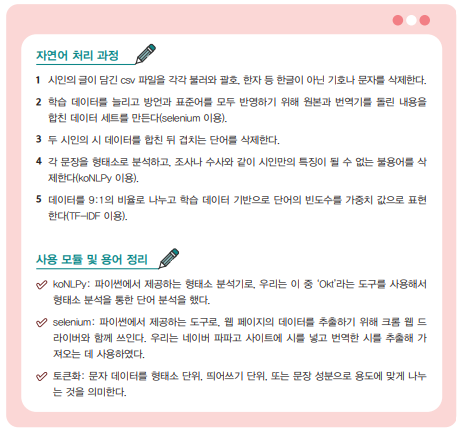

## 나이브 베이지안 모델 생성 및 학습하기 

**인공지능 모델을 만들어 보자.**

사이킷런(sklearn)에서 제공하는 나이브 베이지안 모델을 불러와 변수 m에 저장한다. 또한 여러 확률을 결합하여 함수로 표현하는 나이브 베이지안 알고리즘 특성상 이를 조절하는 파라미터(매개변수)가 필요하다. 여러 가지 파라미터를 변수 alphas에 저장한다.


In [ ]:
from sklearn.naive_bayes import MultinomialNB #나이브 베이지안 라이브러리

m = MultinomialNB() #나이브 베이지안 사용
alphas = [0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.9, 1] #사용할 파라미터 리스트

최적의 파라미터를 찾아주는 라이브러리 GridSearchCV를 호출하여 생성된 나이브 베이지안 모델을 alphas 파라미터 값마다 모두 학습시키고 최고의 성능을 불러와 grid에 저장한다.

 최적의 나이브 베이지안 모델에 학습 데이터(X_train, y_train)를 넣고 학습시킨다.

In [ ]:
from sklearn.model_selection import GridSearchCV #최적의 파라미터를 찾아주는 라이브러리

grid = GridSearchCV(estimator=m, param_grid=dict(alpha=alphas)) #알파값마다 모두 학습해 보고 최고 성능 불러옴
grid.fit(X_train, y_train) #학습

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.9, 1]})

## 나이브 베이지안 모델 평가하기

In [ ]:
score = grid.score(X_test, y_test) #예측은 얼마나 잘하는지 정확도
print('예측 정확도', score)

ypred = grid.predict(X_test)
for i in range(len(ypred)):
  print('예측 :', end=' ')
  if(ypred[i] == 0):
    print("백 석", end=', ')
  else:
    print("김수영", end=', ')
  print('실제 :', end=' ')
  if(y_test[i] == 0):
    print("백 석")
  else:
    print("김수영")

예측 정확도 1.0
예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 김수영
예측 : 백 석, 실제 : 백 석
예측 : 백 석, 실제 : 백 석
예측 : 백 석, 실제 : 백 석
예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 김수영
예측 : 백 석, 실제 : 백 석
예측 : 김수영, 실제 : 김수영
예측 : 백 석, 실제 : 백 석
예측 : 김수영, 실제 : 김수영
예측 : 김수영, 실제 : 김수영
예측 : 백 석, 실제 : 백 석
예측 : 백 석, 실제 : 백 석
예측 : 백 석, 실제 : 백 석


## 나이브 베이지안 모델 테스트하기 

In [ ]:
def poet_predict(new_sentence): #새로운 문장을 예측할 함수
  new_sentence = new_sentence.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", " ") #정규식 변환
  new_sentence = okt.morphs(new_sentence, stem=True) #토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] #불용어 제거

  #TF-IDF를 적용할 수 있는 문장 형태로 변환
  sen= ' '
  for i in range(len(new_sentence)):
    sen = sen + new_sentence[i]+' '
  new_sentence=sen

  #TF-IDF로 변환
  new_dtm = dtmvector.transform([new_sentence])
  new_sentence = tfidf_transformer.transform(new_dtm)

  score = grid.predict_proba(new_sentence) #예측
  print(score)
  if(score[0][0] >= score[0][1]): #예측 결과 왼쪽(0번째 자리)의 확률이 더 크면 백석의 시
    print("백석의 시입니다.\n")
  else: #예측 결과 오른쪽(1번째 자리)의 확률이 더 크면 김수영의 시
    print("김수영의 시입니다.\n")

In [ ]:
#[어느 날 고궁을 나오면서] - 김수영 시인
sentence_kim = '왜 나는 조그마한 일에만 분개하는가 저 왕궁 대신에 왕궁의 음탕 대신에'
poet_predict(sentence_kim)

[[0.0044971 0.9955029]]
김수영의 시입니다.



In [ ]:
#[흰 바람벽이 있어] - 백석 시인
sentence_baek = '오늘 저녁 이 좁다란 방의 흰 바람벽에 어쩐지 쓸쓸한 것만이 오고 간다'
poet_predict(sentence_baek)

[[0.82644789 0.17355211]]
백석의 시입니다.



In [ ]:
#[별 헤는 밤] - 윤동주 시인
sentence_yoon1 = '노새, 노루, 프랑시스 잠, 라이너 마리아 릴케, 이런 詩人시인의 이름을 불러 봅니다.'
poet_predict(sentence_yoon1)

[[0.99594813 0.00405187]]
백석의 시입니다.



In [ ]:
#[별 헤는 밤] - 윤동주 시인
sentence_yoon2 = '어머님, 그리고 당신은 멀리 北間島북간도에 계십니다.'
poet_predict(sentence_yoon2)

[[0.61251805 0.38748195]]
백석의 시입니다.

